## <span style="color:green">  ESERCITAZIONE 2</span>

### <span style="color:blue">  Esercizio 02.1</span>
<span style="color:blue">  1. Calcola usando i metodi Monte Carlo e campionando la distribuzione uniforme $[0,1]$ l'integrale:
\begin{equation}   
    I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1.
\end{equation}
</span>

Per calcolare questo integrale, usiamo il metodo della media a blocchi visto nell'Esercitazione precedente. Estraiamo la $x$ nell'intervallo $[0,1]$ usando sempre il nostro generatore di numeri casuali. Possiamo vedere così l'integrale da calcolare: 
\begin{equation}   
    I = \int_0^1 g(x)p(x)dx
\end{equation}

essendo $g(x)$ la funzione da integrare e $p(x)$ la distribuzione di probabilità da campionare, ossia la distribuzione da cui estraggo i valori random di $x$. In questo caso abbiamo: 
\begin{equation}
   g(x)=\frac{\pi}{2}\cos(\pi x/2) \quad \quad p(x)=1.
\end{equation}


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

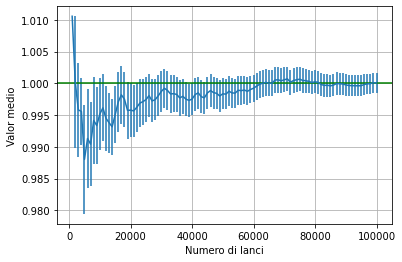

In [2]:
x, f, error = np.loadtxt("cosinus_one.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=1.0, color='green')
plt.xlabel('Numero di lanci')
plt.ylabel('Valor medio')
plt.grid(True)
plt.show()

Possiamo osservare che il valore dell'integrale converge ad $1$, il risultato che si calcola analiticamente.

<span style="color:blue"> 2. Calcola lo stesso integrale usando il metodo dell'importance sampling. </span>

Usare il metodo dell'importance sampling significa estrarre la variabile $x$ da una distribuzione di probabilità più accurata, in modo che l'integrale converga al valore teorico in una maniera più precisa. Per scegliere la nuova distribuzione di probabiltà, osserviamo la funzione da integrare: è una cosinusoide. Una funzione che la approssima è una retta con coefficiente angolare negativo e che interseca l'asse y in $1$. La distribuzione di probabiltà da cui estraiamo $x$ è $p(x)=2(1-x)$. Il fattore $2$ si ottiene facendo la normalizzazione: $N\int_0^1 (1-x)dx=1$, che fa: $N=2$.

Poiché $I$ deve rimanere lo stesso, avendo trovato una nuova $p(x)$, anche la funzione da integrare $g(x)$ sarà diversa: sarà l'integranda iniziale diviso la nuova distribuzione di probabilità. Ecco le nuove funzioni: 
\begin{equation}
   g(x)=\frac{\pi}{2}\frac{\cos(\pi x/2)}{2(1-x)} \quad \quad p(x)=2(1-x).
\end{equation}

La nuova $p(x)$ è l'area compresa tra le rette $x=0$, $y=0$ e $y=2(1-x)$: è un triangolo. Per estrarre i punti dall'intervallo uso la tecnica dell'accept/reject: 
1. genero la $x$ tra $[0,1]$ e genero la $y$ tra $[0,2]$; queste sono le coordinate del punto: 
2. se la $y$ del punto è sopra la retta $y=2(1-x)$ scarto il punto,
3. altrimenti tengo il punto e ho una $x$ per calcolare l'integrale. 

Qual è il vantaggio di utilizzare un intervallo costruito in questo modo anziché il più semplice $[0,1]$? Perché ottengo dei punti più precisi. In questo specifico esempio, l'algoritmo scarta la metà dei punti generati e tiene i migliori, quelli che campionano meglio la funzione. Rispetto ad usare la distribuzione uniforme, nel calcolare l'integrale, otterremo che le barre di errore saranno più corte, perché appunto il risultato è più preciso.

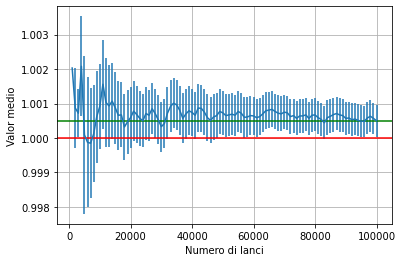

In [3]:
x, f, error = np.loadtxt("cosinus_two.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=1.0005, color='green')
plt.axhline(y=1.0, color='red')

plt.xlabel('Numero di lanci')
plt.ylabel('Valor medio')
plt.grid(True)
plt.show()

Nel grafico sono indicate in verde il valore a cui converge l'integrale e in rosso il valore teorico atteso. Le barre di errore toccano per i due terzi delle volte la linea del valore teorico. Rispetto al grafico precedente, può sembrare che l'integrale non converga al valore teorico. Possiamo osservare che, rispetto al calcolo precedente, le barre di errore si sono accorciate. Se nel caso precedente erano lunghe in media $0.005$, adesso sono lunghe in media $0.001$: l'errore si è ridotto ad un quinto del suo valore iniziale. Questa simulazione è più precisa rispetto a quella precedente. Possiamo osservare la convergenza, un piccolo errore e il valore teorico rientra più volte nelle barre dell'incertezza, quindi possiamo dire che l'esperimento è riuscito. 

Infine guardiamo la percentuale di coppie accettate nel fare l'importance sampling. I dati si riferiscono all'ultima simulazione di ogni blocco.

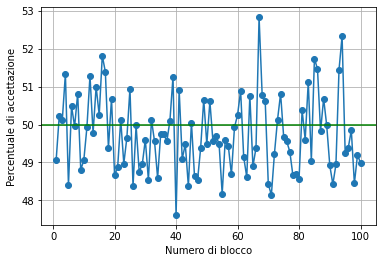

In [3]:
x, f = np.loadtxt("accettati.dat", usecols=(0,1), delimiter='  ', unpack='true')
plt.plot(x,f,'o-')
plt.axhline(y=50.0, color='green')
plt.xlabel('Numero di blocco')
plt.ylabel('Percentuale di accettazione')
plt.grid(True)
plt.show()

La percentuale si aggira attorno al $50\%$. In media è stata accettata una coppia ogni due prodotte.

### <span style="color:blue">  Esercizio 02.2</span>
<span style="color:blue">  1. Costruisci un Random Walk RW in 3D su un reticolo cubico di passo reticolare $a=1$ e calcola: $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$.

Il codice genera $10^4$ Random Walk in $3D$. Lo spazio in cui si muove il random walker è un reticolo cubico nelle tre dimensioni $x$, $y$ e $z$, con passo reticolare $1$. Vogliamo verificare prima di tutto che il Random Walk sia un processo diffusivo: partendo dall'origine, verifichiamo che il random walker, ad ogni passo, si allontani sempre di più. Ho scritto un codice che genera un solo Random Walk e che, ad ogni passo, calcola la norma della posizione, ossia la distanza tra l'origine e il punto di arrivo. Nel grafico successivo rappresentiamo come varia il valore di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ ad ogni singolo passo.

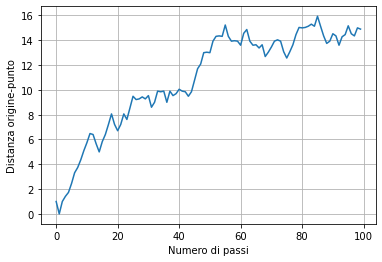

In [3]:
x, f = np.loadtxt("100_passi_reticolo.dat", usecols=(0,1), delimiter='  ', unpack='true')
plt.plot(x,f)
plt.xlabel('Numero di passi')
plt.ylabel('Distanza origine-punto')
plt.grid(True)
plt.show()

E' possibile fare un fit del grafico precedente con una funzione diffusiva del tipo: $f(x)=k\sqrt{x}$. Si osserva un comportamento diffusivo nel percorso.

optimized parameters [k] =
[1.64034251]
parameters uncertainty =
[0.01583743]


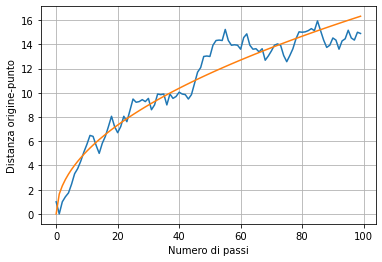

In [4]:
from scipy.optimize import curve_fit

def Dis(x,k):  #Funzione con cui fare il fit.
    return k * np.sqrt(x)

x, f = np.loadtxt("100_passi_reticolo.dat", usecols=(0,1), delimiter='  ', unpack='true')
plt.plot(x,f)

#x = np.arange(0.0,100.0,1.0)
#y = Dis(x,1.6)
#plt.plot(x,Dis)

p_opt, p_cov = curve_fit(Dis, x, f)
y_fit = Dis(x,p_opt[0])
plt.plot(x,y_fit) #Plot dei dati fatto il fit.

print("optimized parameters [k] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

plt.xlabel('Numero di passi')
plt.ylabel('Distanza origine-punto')
plt.grid(True)
plt.show()

Si vede che l'andamento del valore della norma con l'aumentare del numero dei passi, può essere fittato con una parabola $f(x)=k\sqrt{x}$, con $k=1.64$. Osserviamo che, passo dopo passo, dall'origine fino alla posizione finale, la distanza dall'origine aumenta e che il nostro random walker si è allontanato. 
Ciascun Random Walk è fatto di $100$ passi. Possiamo riassumere il percorso del random walker, quindi le operazioni che svolge il codice, come segue:
1. parti dall'origine,
2. scegli, con uguale probabilità, una direzione tra $x$, $y$ e $z$,
3. scegli, con uguale probabilità, un verso: avanti o indietro,
4. spostati di un passo in avanti o un passo indietro lungo la direzione selezionata,
5. nella nuova posizone in cui ti trovi, ripeti le azioni 2, 3 e 4 per $100$ volte,
6. sei nella posizione finale: calcola la distanza tra questo punto e l'origine.

Per calcolare il valore finale della distanza tra l'origine e il punto finale, ho usato il metodo della media a blocchi, come negli esercizi precedenti. Il codice genera prima $100$ Random Walk: questi costituiscono un blocco, dopodiché genera $100$ blocchi in questa maniera. In totale sono generati $10^4$ Random Walk, divisi in $100$ blocchi con $100$ elementi ciascuno. Il grafico sotto rappresenta il risultato della media a blocchi. Osserviamo che $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ converge.

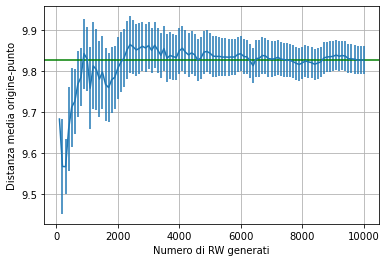

In [2]:
x, f, error = np.loadtxt("posizioni_reticolo.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=9.82604, color='green')
plt.xlabel('Numero di RW generati')
plt.ylabel('Distanza media origine-punto')
plt.grid(True)
plt.show()

<span style="color:blue">  2. Costruisci un Random Walk RW in 3D nel continuo con passi di lunghezza $a=1$ e calcola: $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$.

Il random walker adesso cammina nello spazio continuo: il suo moto è descritto dalle coordinate sferiche $(a,\theta,\phi)$, con $a=1$, $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$. I passi hanno tutti la stessa lunghezza $a$, mentre la direzione e il verso si ottengono campionando uniformemente l'angolo solido descritto da $\theta$ e $\phi$. Queste due variabili sono estratte random secondo due diverse distribuzioni di probabilità. Per $\phi$ è: $\phi \in [0,2\pi]$. Per $\theta$ invece la distribuzione non è scontata. Noi vorremmo che $\theta$ e $\phi$ descrivessero dei punti che campionano lo stesso angolo solido e non che siano dei semplici valori estratti a sorte. La distribuzione di probabilità di $\theta$ è: $p(\theta)=0.5\sin(\theta)$; usando il metodo dell'inversione della cumulativa si ottiene: $\theta=\cos^{-1}(1-2q)$, con $q\in [0,1)$, uniformemente distribuito. Ho ampliato il file *random.cpp* aggiungendo le due nuove distribuzioni di probabilità che campionano $\theta$ e $\phi$:
\begin{equation}
   \phi \in [0,2\pi] \quad \quad \theta=\cos^{-1}(1-2q), \quad q\in [0,1).
\end{equation}

Una volta estratte le coordinate radiali, è possibile convertirle nelle coordinate cartesiane mediante le relazioni: 
\begin{equation}
   x=a\sin(\theta)\cos(\phi), \quad \quad y=a\sin(\theta)\sin(\phi), \quad \quad z=a\cos(\theta).
\end{equation}

Ogni Random Walk è costituito da $100$ passi. Alla fine del cammino il codice calcola $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, ossia la distanza tra il punto di partenza, l'origine e il punto di arrivo. Come nel punto precedente, inizio a generare un solo Random Walk e verifico che abbia un comportamento diffusivo.

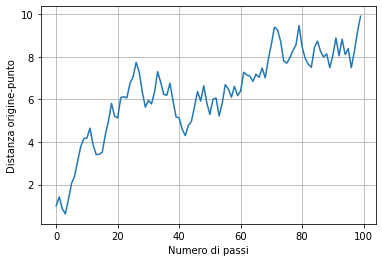

In [5]:
x, f = np.loadtxt("100_passi_continuo.dat", usecols=(0,1), delimiter='  ', unpack='true')
plt.plot(x,f)
plt.xlabel('Numero di passi')
plt.ylabel('Distanza origine-punto')
plt.grid(True)
plt.show()

In media, il random walker si allontana dall'origine con l'aumentare dei passi. Facciamo il fit con la parabola che indica la legge diffusiva: $f(x)=k\sqrt x$.

optimized parameters [k] =
[0.92664787]
parameters uncertainty =
[0.0145478]


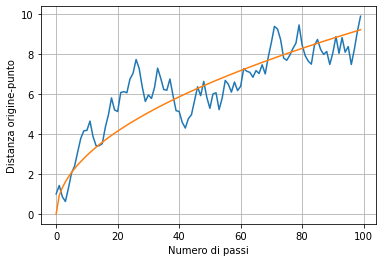

In [6]:
from scipy.optimize import curve_fit

def Dis(x,k):  #Funzione con cui fare il fit.
    return k * np.sqrt(x)

x, f = np.loadtxt("100_passi_continuo.dat", usecols=(0,1), delimiter='  ', unpack='true')
plt.plot(x,f)

p_opt, p_cov = curve_fit(Dis, x, f)
y_fit = Dis(x,p_opt[0])
plt.plot(x,y_fit) #Plot dei dati fatto il fit.

print("optimized parameters [k] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

plt.xlabel('Numero di passi')
plt.ylabel('Distanza origine-punto')
plt.grid(True)
plt.show()

Anche nel caso continuo, si osserva il comportamento diffusivo, con $k=0.92$, più piccolo rispetto al caso del reticolo. Questo caso è meno diffusivo perché il random walker può scegliere tutti i possibili valori dell'angolo solido, invece nel caso del reticolo, le direzioni possibili degli spostamenti sono ortogonali tra loro. 

Concludiamo calcolando il valore a cui la distanza origine-punto finale converge, usando sempre il metodo della media a blocchi. Anche in questo caso, il codice genera $100$ Random Walk di $100$ passi, il tutto ripetuto per $100$ blocchi. Riportiamo le operazioni che svolge il codice:
1. parti dall'origine,
2. scegli i due angoli $\phi$ e $\theta$ secondo le distribuzioni indicate; $a=1$ è fissato,
3. calcola le relative coordinate cartesiane $x$, $y$, $z$ e spostati qui,
4. nella nuova posizione, ripeti le operazioni 2 e 3 per $100$ volte,
5. sei nella posizione finale: calcola la distanza tra questo punto e l'origine.

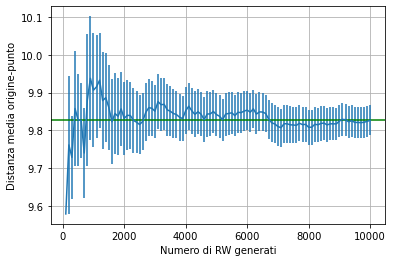

In [3]:
x, f, error = np.loadtxt("posizioni_continuo.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=9.82678, color='green')
plt.xlabel('Numero di RW generati')
plt.ylabel('Distanza media origine-punto')
plt.grid(True)
plt.show()

Il valore dell'integrale converge. Osserviamo che, se generiamo tanti Random Walk, i valori medi di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ per i due casi coincidono.